## <font color=blue> Calculus 2nd derivative in SymPy - Concavity

This is part of the series of math algorithms to define 3D shapes as math objects.

### <font color=blue> Summary

The 2nd derivative provides insights on the concavity of a curve:
    * If 2nd derivative is positive, the curve is concave down
    * If 2nd derivative is negative, the curve is concave up.
### <font color=blue> Problem: 
Given an expression, for example: x**2/16 +1, which is a parabola, determine if it is concave up (convex)
    or concave down.
### <font color=blue> Process:  
* Take first derivative
* Take derivative of the first derivative (this equals the second derivative)
* Evaluate second derivative; if > 0, then concave down, if < 0, then concave up. If zero, no concavity. 
                                                                
### <font color=blue> Notes: 
* Section 1 provides the step-by-step algorithm with plots and interim results.  
* Section 2 presents the algorithm in more concise fashion that can be easily copied and used. 



## <font color=purple> SECTION 1: Algorithm with execution details (plots of data, interim calculations, etc)

In [1]:
import numpy as np
import scipy as s
import matplotlib.pyplot as plt
%matplotlib inline


### Key Inputs: expression and interval for evaluation

In [2]:
from sympy import pprint, init_printing
from sympy import *
init_printing(use_unicode=True)
from sympy import Symbol, Eq,  solveset, S
import math

x= Symbol('x')                                # define x as a symbol

In [3]:
expr = x**2/16 +1                            # parabola, x_min = -4 x_max = 4

x_min = -4                                   # specify interval (min)
x_max = 4                                   # specify interval (max)
print("Expression: ", expr, "      Interval: ", x_min,',', x_max)

Expression:  x**2/16 + 1       Interval:  -4 , 4


### Plot the expression for visualization

Expression:


      Interval:  -4 , 4


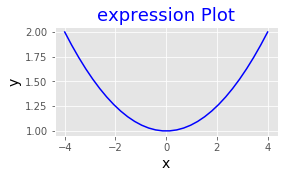

In [4]:
# Plot the function to understand the function and data
print("Expression:")
display(expr)
print( "      Interval: ", x_min,',', x_max)

# Create data for plot of function
x_expr = [x for x in np.linspace(start = x_min, stop = x_max, num = 30)]
y_expr = []
for x_data in x_expr:
    y = expr.subs([(x, x_data)])            # Substitution, uses value of x_data for x in expression
    y_expr.append(y)

# Plot data    
plt.figure(figsize=(4,2))                       # resets to new figure   
plt.style.use('ggplot')
plt.xlabel('x', fontsize = 14, color='black')
plt.ylabel('y', fontsize = 14, color='black')
plt.title("expression Plot", loc='center', fontsize=18, color='b')
plt.plot(x_expr,y_expr, color='blue')
# for x_data in [-2,0,2,4,5]: print(x_data, expr.subs([(x, x_data)]) )

### Take a derivative of f(x), the 1st derivative, with respect to x and plot derivative:

In [5]:
from sympy import Derivative
print("Expression:")
display(expr)

deriv1= Derivative(expr, x)                   # take 1st derivative
print('Derivative:' )
display(deriv1.doit())                        # 

value_der = deriv1.doit().subs({x:4})             # derivative at x = 4
value_expr = expr.subs([(x, 4)])              # function at x = 4
print('At x = 4, the Value of function is {} and Value of deriviative is {} '.format(value_expr,value_der))
value_der = deriv1.doit().subs({x:0})             # derivative at x = 4
value_expr = expr.subs([(x, 0)])              # function at x = 4
print('At x = 0, the Value of function is {} and Value of deriviative is {} '.format(value_expr,value_der))

Expression:


Derivative:


At x = 4, the Value of function is 2 and Value of deriviative is 1/2 
At x = 0, the Value of function is 1 and Value of deriviative is 0 


### Plot 1st derivative on same chart as expression for visulization

In [6]:
# Create the derivative plot data (function data already done)
x_der = [x for x in np.linspace(start = x_min, stop = x_max, num = 30)]
y_der = []
for x_data in x_der:
    y = deriv1.doit().subs({x:x_data})             # derivative at x = ....
    y_der.append(y)

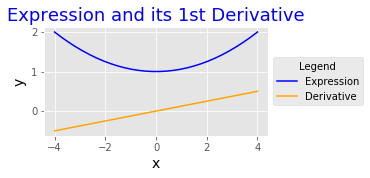

In [7]:
plt.figure(figsize=(4,2))                       # resets to new figure
plt.title('Expression and its 1st Derivative', loc='center', fontsize=18, color='b')
line_chart1 = plt.plot(x_expr, y_expr, color = 'blue')
line_chart2 = plt.plot(x_der, y_der, color = 'orange')
plt.xlabel('x', fontsize = 14, color='black')
plt.ylabel('y', fontsize = 14, color='black')
plt.legend(['Expression', 'Derivative'], loc='center left', bbox_to_anchor=(1.0, 0.5), title='Legend')

plt.show()

### Take 2nd derivative of expression
If 2nd derivative > 0, curve is concave upward.

If 2nd derivative < 0, curve is concave downward.

In [8]:
print('Derivative 1: ', deriv1.doit())          # Use 1st derivative
deriv2= Derivative(deriv1.doit(), x)                   # take 2nd derivative from 1st derivative
print('Derivative 2: ', deriv2.doit())

der2 = deriv2.doit()
concave = "2nd derivative is zero (no concavity)"
if der2 < 0: 
    concave = "2nd derivative is negative (concave up, convex)"
elif der2 > 0: concave =  "2nd derivative is positive (concave down)"
print('2nd derivative = {}; {}'.format(der2,concave))

Derivative 1:  x/8
Derivative 2:  1/8
2nd derivative = 1/8; 2nd derivative is positive (concave down)


## <font color=purple> SECTION 2: Concise Algorithm (without all the plots and interim results)

### <font color=blue> Setup Algorithm as function

In [9]:
def second_deriv(expr, x):
    """
    Purpose:  Calculate the 2nd derivative of a given expression
    Inputs:   Expression to be evaluated and x variable
    Process:  Calculate 1st derivative and take derivative of 1st derivative to get 2nd derivative; 
    execute 2nd derivative. 
    Outputs:  2nd derivative results  
    """
    deriv1= Derivative(expr, x)                   # take 1st derivative     
    deriv2= Derivative(deriv1.doit(), x)          # take derivative of 1st derivative to get 2nd derivative
    return deriv2.doit()                          # exec and return

### <font color=blue> Execute Concise Algorithm

In [10]:
from sympy import *
from sympy import Symbol, Eq,  solveset, S
import math

# Specify inputs
x= Symbol('x')                               # define x as a symbol
eXpr = x**2/16 +1                            # parabola


# Execute function 
der2 = second_deriv(eXpr, x )   # execute functiontive 

# print results
concave = "2nd derivative is zero (no concavity)"
if der2 < 0: 
    concave = "2nd derivative is negative (concave up, convex)"
elif der2 > 0: concave =  "2nd derivative is positive (concave down)"
print('2nd derivative = {}; {}'.format(der2,concave))

2nd derivative = 1/8; 2nd derivative is positive (concave down)
